In [1]:
#imports
import pandas as pd
import os
from dotenv import load_dotenv
from sklearn.preprocessing import LabelEncoder

# Load environment variables
load_dotenv()

# Read CSV file
df = pd.read_csv(os.environ['TRAIN_LOCATION'])
df = df.drop(columns=['id'])

# View result
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [2]:
#Check for missing and duplicates
print(df.duplicated().sum()) # no duplicates
df.isna().sum() #We have alot of missing data that we will deal with in different ways

0


Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [3]:
from utils.helpers import preprocessing
df = preprocessing(df)
df

,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,Aaradhya,-1.106808,0.695308,Ludhiana,0.49724,Chef,-7.225348e-16,1.589716e+00,0.000000,1.466825e-15,-0.768557,1.373503,1.256670,-0.623184,-0.988755,-1.362980,-0.699594,-0.994326,-0.471205
1,Vivan,0.903499,-1.161856,Varanasi,0.49724,Teacher,-7.225348e-16,7.952385e-01,0.000000,1.466825e-15,0.020101,0.450160,-1.230543,0.486504,1.011373,0.193953,0.007808,-0.994326,2.122220
2,Yuvraj,0.903499,-0.596633,Visakhapatnam,-2.01110,Student,3.022587e+00,-3.528188e-16,2.011251,-1.559884e+00,0.000000,-1.396526,1.256670,-1.067060,1.011373,-0.844002,-1.406997,-0.994326,2.122220
3,Yuvraj,0.903499,-1.484842,Mumbai,0.49724,Teacher,-7.225348e-16,1.589716e+00,0.000000,1.466825e-15,-1.557214,0.450160,0.013064,-0.808132,1.011373,0.972420,-1.406997,1.005706,2.122220
4,Rhea,-1.106808,-0.838871,Kanpur,0.49724,Business Analyst,-7.225348e-16,-1.588193e+00,0.000000,1.466825e-15,-1.557214,-1.396526,-1.230543,-0.808132,1.011373,0.712931,0.715211,1.005706,-0.471205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Vidya,-1.106808,-1.807827,Ahmedabad,0.49724,Unemployed,-7.225348e-16,1.589716e+00,0.000000,1.466825e-15,0.808758,-1.396526,-1.230543,-0.179309,-0.988755,-1.103491,0.715211,1.005706,2.122220
140696,Lata,-1.106808,0.049338,Hyderabad,0.49724,Content Writer,-7.225348e-16,1.589716e+00,0.000000,1.466825e-15,0.808758,-0.473183,0.013064,-0.956091,1.011373,-0.065536,1.422614,1.005706,-0.471205
140697,Aanchal,-1.106808,-1.323349,Kolkata,0.49724,Marketing Manager,-7.225348e-16,7.612366e-04,0.000000,1.466825e-15,-1.557214,1.373503,0.013064,-1.141039,-0.988755,-0.584513,0.715211,-0.994326,-0.471205
140698,Prachi,-1.106808,0.695308,Srinagar,0.49724,Plumber,-7.225348e-16,1.589716e+00,0.000000,1.466825e-15,-0.768557,-1.396526,0.013064,1.263286,1.011373,0.972420,-1.406997,-0.994326,-0.471205


In [4]:
#Now we want to split it into 2 datasets, students and workers
students_df = df.loc[df["working_student"] == 0].drop({"working_student", "work_pressure", "job_satisfaction"}, axis=1)
working_df = df.loc[df["working_student"] == 1].drop({"working_student", "study_satisfaction", "cgpa", "academic_pressure"}, axis=1)

display(students_df)

,name,gender,age,city,profession,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression


In [5]:
# from OurModels import LinearRegressionModel
# model = LinearRegressionModel()
# modelResults = model.train(students_df)
# model.output(*modelResults)  # unpack y_pred, y_test
# model.charts(*modelResults)

In [6]:
from OurModels import LogisticRegressionModel
model = LogisticRegressionModel()
results = model.train(df)
model.charts(*results)
model.output(*results)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

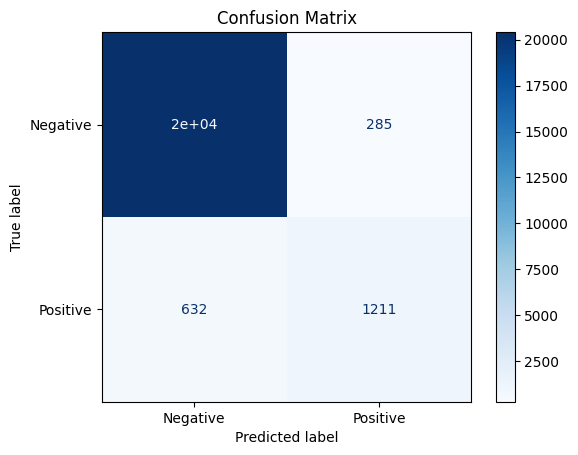

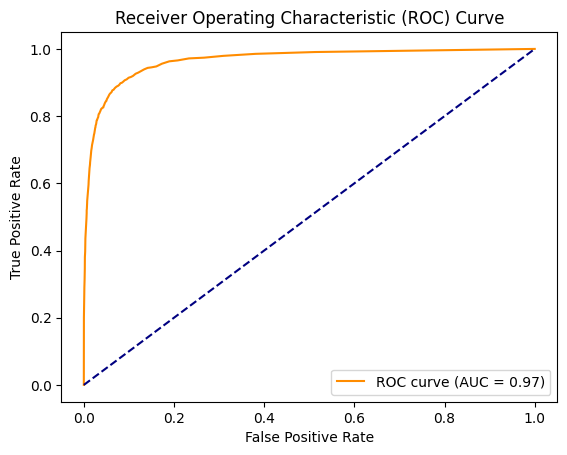


📊 SVC Model Performance
----------------------------------------
Accuracy : 0.9593
Precision: 0.9569
Recall   : 0.9593
F1 Score : 0.9574
----------------------------------------
OOB score: 0.9587
Top feature importances:
                  feature  importance
0                     age    0.379842
1       suicidal_thoughts    0.086762
2         workstudy_hours    0.082182
3           work_pressure    0.078534
4        financial_stress    0.069887
5        job_satisfaction    0.067615
6                  degree    0.059905
7              profession    0.058936
8          sleep_duration    0.041516
9          dietary_habits    0.034768
10  family_mental_illness    0.020140
11                 gender    0.019912


In [8]:
workingModelResults = model.train(working_df)
model.charts(*workingModelResults)
model.output(*workingModelResults)

In [9]:
student = (students_df['depression'] == 1).sum()
working = (working_df['depression'] == 1).sum()
total = (df['depression'] == 1).sum()

print(round(student/total * 100),"%")
print(round(working/total * 100), "%")

64 %
36 %
